## Reference




*   [1](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py)


*   [2](http://deeplearning.cs.cmu.edu/)

* [3](https://github.com/rougier/numpy-100/blob/master/100_Numpy_exercises.md)


*  [4](https://github.com/yunjey/pytorch-tutorial)



## Imports

In [0]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt

## Tensors

Constructing a tensor directly from data:

In [0]:
x = torch.tensor([1, 2, 3, 4])

We may check the data type, shape and device of tensor as follows:

In [0]:
print('dtyep = ', x.dtype)
print('shape = ', x.shape)
print('shape = ',  x.size())
print('device = ', x.device)

dtyep =  torch.int64
shape =  torch.Size([4])
shape =  torch.Size([4])
device =  cpu


Let's change the dtype of tensors to float32:



In [0]:
x = x.to(torch.float32)
print(x.dtype)

torch.float32


Let's put the tensor on GPU. We first check whether the GPU is availabel

In [0]:
print(torch.cuda.is_available())

True


In [0]:
x = x.to('cuda')
print('device = ', x.device)

device =  cuda:0


<font color='red'> **Q 1** </font> :  **Put x back on CPU and change its dtype to int16**.





<font color='red'> **Q 2** </font> : **Convert x to a numpy array.**



We can change the shape of tensors as follows:

In [0]:
x = x.view([2, 2])
print(x)

tensor([[1., 2.],
        [3., 4.]], device='cuda:0')


Now x is a $2\times2$  tensor.

We may also use creation operators to define and initialize tensors:

In [0]:
torch.zeros(2, 3) 

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [0]:
torch.ones(2, 2)

tensor([[1., 1.],
        [1., 1.]])

In [0]:
torch.arange(1, 4)

tensor([1, 2, 3])

In [0]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [0]:
torch.randn(2, 3)

tensor([[-0.6999,  1.3678, -0.8738],
        [-0.4393,  0.7012, -0.8539]])

<font color='red'> **Q 3** </font> : **Initialize x and y cuda tensors with shape [4, 3] and [2, 6] according to uniform distribution on the interva [0, 1). Reshape y according to x's shape.**





 ***Operations on tensors.***

<font color='red'> **Q 4** </font> : **Create two tensors x, y with  random integer in the range=[0, 10) and size=10000. How much percent of their elements are equvalent?**

<font color='red'> **Q 5** </font> : **Normalize a random vector with size=10 ?**


<font color='red'> **Q 6** </font> :**Multiply a 5x3 matrix by a 3x2 matrix.**


<font color='red'> **Q 7** </font> : **Given a 1D array**


> x = torch.arange(0, 10)

**negate all elements which are between 3 and 8, in place.**

In [0]:
x = torch.arange(0, 10)
x[(3 < x) & (x < 8)] *= -1

SyntaxError: ignored

<font color='red'> **Q 8** </font> : **Create a random vector of size 10 and sort it**

<font color='red'> **Q 9** </font> :**Create random vector of size 10 and replace the maximum value by 0**



<font color='red'> **Q 10** </font> : **Given the following tensors**


> x = torch.rand(100, 4)

> w = torch.rand(8, 4)

> b = torch.rand(8)

**compute**:
> y = w * x + b 




## Autograd:

Pytorch provides automatic differentiation for all operations on Tensors. Create a tensor and set requires_grad=True to track gradients

In [0]:
x = torch.ones(1, requires_grad=True)
print(x)

tensor([1.], requires_grad=True)


Do a tensor operation:

In [0]:
y = x**3
print(y)

tensor([1.], grad_fn=<PowBackward0>)


Let's compute the gradient of y with respect to x

In [0]:
y.backward()
print(x.grad)

tensor([3.])


<font color='red'> **Q 11** </font> : **Given the following variables**

> x = 1.

> w = 2.

> b = 3.

**compute the gradients  of z = w * x + b with respect to x, w and b.** 

##  Optimization

torch.optim is a package implementing various optimization algorithms. It works like this


>```
for i in range(....):
    optimizer.zero_grad()
    get objective_function 
    objective_function.backward()
    optimizer.step()
```


<font color='red'> **Q 12** </font> :**Compute the minimum of** $f(x) = 2 x^2 - 4 x $

## Curve Fitting

Now we build a linea model for a toy dataset

In [0]:
x_train = torch.tensor([[3.2], [4.4], [5.5], [6.71], [6.93]])

y_train = torch.tensor([[1.7], [2.1], [2.8], [3.19], [3.694]])

We fit a linear line $y = w x + b$ to the data points. 

In [0]:
w = torch.rand([1, 1], requires_grad=True)
b = torch.rand([1], requires_grad=True)

In [0]:
optimizer = torch.optim.SGD([w, b], lr=0.01)
criterion = torch.nn.MSELoss() #  mean squared error
for i in range(10):
  optimizer.zero_grad()
  outputs = torch.matmul(x_train, w) + b
  loss = criterion(outputs, y_train)
  loss.backward()
  optimizer.step()
  print('loss = ', loss.item())
  print('----------')

loss =  0.6675872802734375
----------
loss =  0.43829500675201416
----------
loss =  0.40726780891418457
----------
loss =  0.40294498205184937
----------
loss =  0.4022195041179657
----------
loss =  0.40197885036468506
----------
loss =  0.4018038213253021
----------
loss =  0.40163785219192505
----------
loss =  0.4014735817909241
----------
loss =  0.40130990743637085
----------


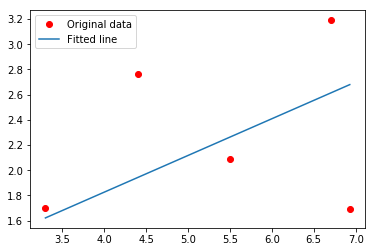

In [0]:
# Plot the graph
predicted = outputs.detach().numpy()
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predicted, label='Fitted line')
plt.legend()
plt.show()

## Datasets

In [0]:
train_dataset = torchvision.datasets.MNIST(root='./data/', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data/', train=False, transform=torchvision.transforms.ToTensor(), download=True)

0it [00:00, ?it/s]

9920512it [00:01, 9011452.54it/s]                            


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 138787.97it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


1654784it [00:00, 2199256.68it/s]                            
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


8192it [00:00, 51248.92it/s]            


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [0]:
image, label = train_dataset[0]
print (image.size())
print (label)

torch.Size([1, 28, 28])
5


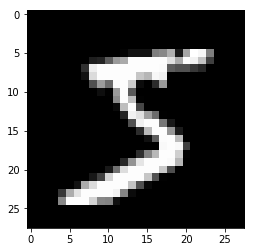

In [0]:
plt.imshow(image[0].numpy(), cmap='gray')
plt.show()

In [0]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
# Actual usage of the data loader is as below.
for images, labels in train_loader:
    # Training code should be written here.
    pass

<font color='red'> **Q 13** </font> : **Build a linear classifier on GPU for MNIST and compute its accuracy.**